In [235]:
import pandas as pd
import numpy as np
import math
import os

In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

In [460]:
path = "C:\\Users\\lenovo\\Downloads\\HR_Data.csv"

In [461]:
df1 = pd.read_csv(path)

In [462]:
df = df1.copy()

In [463]:
df.head()

,Candidate_ID,Name,Gender,Age,Degree,Branch,College_Tier,CGPA,Projects_Count,Internships_Count,Programming_Skills,Tools,Certifications,Communication_Score,Logical_Aptitude_Score,Final_Selection
0,1,Candidate_1,M,21,B.E.,ECE,Tier 2,8.95,4,0,"C, Python, JavaScript",Excel,Yes,8,8,1
1,2,Candidate_2,M,22,B.E.,ECE,Tier 2,7.11,0,0,"C, C++, Java",Excel,No,4,4,0
2,3,Candidate_3,F,21,B.E.,EEE,Tier 2,9.23,3,2,C,VS Code,No,10,9,1
3,4,Candidate_4,F,22,B.Tech,CSE,Tier 2,9.09,0,0,C,"PowerBI, Git",Yes,6,6,0
4,5,Candidate_5,M,23,B.Tech,MECH,Tier 2,8.14,1,0,"C, C++","VS Code, Excel, Git",No,10,10,1


In [242]:
l = df.columns.to_list()
l

['Candidate_ID',
 'Name',
 'Gender',
 'Age',
 'Degree',
 'Branch',
 'College_Tier',
 'CGPA',
 'Projects_Count',
 'Internships_Count',
 'Programming_Skills',
 'Tools',
 'Certifications',
 'Communication_Score',
 'Logical_Aptitude_Score',
 'Final_Selection']

In [243]:
df

,Candidate_ID,Name,Gender,Age,Degree,Branch,College_Tier,CGPA,Projects_Count,Internships_Count,Programming_Skills,Tools,Certifications,Communication_Score,Logical_Aptitude_Score,Final_Selection
0,1,Candidate_1,M,21,B.E.,ECE,Tier 2,8.95,4,0,"C, Python, JavaScript",Excel,Yes,8,8,1
1,2,Candidate_2,M,22,B.E.,ECE,Tier 2,7.11,0,0,"C, C++, Java",Excel,No,4,4,0
2,3,Candidate_3,F,21,B.E.,EEE,Tier 2,9.23,3,2,C,VS Code,No,10,9,1
3,4,Candidate_4,F,22,B.Tech,CSE,Tier 2,9.09,0,0,C,"PowerBI, Git",Yes,6,6,0
4,5,Candidate_5,M,23,B.Tech,MECH,Tier 2,8.14,1,0,"C, C++","VS Code, Excel, Git",No,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Candidate_496,F,22,B.E.,CSE,Tier 1,7.34,1,2,"C++, Java, Python","VS Code, Git, PowerBI",No,10,9,1
496,497,Candidate_497,M,21,B.Tech,MECH,Tier 2,6.97,2,2,"JavaScript, Python","SQL, Git, Excel",No,4,4,0
497,498,Candidate_498,M,24,B.E.,MECH,Tier 3,7.81,1,2,"JavaScript, Java, C","Git, Excel",No,8,9,0
498,499,Candidate_499,M,21,B.E.,MECH,Tier 2,9.29,2,1,Java,"PowerBI, VS Code, SQL",Yes,4,7,0


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Candidate_ID            500 non-null    int64  
 1   Name                    500 non-null    object 
 2   Gender                  500 non-null    object 
 3   Age                     500 non-null    int64  
 4   Degree                  500 non-null    object 
 5   Branch                  500 non-null    object 
 6   College_Tier            500 non-null    object 
 7   CGPA                    500 non-null    float64
 8   Projects_Count          500 non-null    int64  
 9   Internships_Count       500 non-null    int64  
 10  Programming_Skills      500 non-null    object 
 11  Tools                   500 non-null    object 
 12  Certifications          500 non-null    object 
 13  Communication_Score     500 non-null    int64  
 14  Logical_Aptitude_Score  500 non-null    in

In [245]:
df.drop(columns=['Candidate_ID','Name'], axis="columns", inplace=True)

In [246]:
df.head()

,Gender,Age,Degree,Branch,College_Tier,CGPA,Projects_Count,Internships_Count,Programming_Skills,Tools,Certifications,Communication_Score,Logical_Aptitude_Score,Final_Selection
0,M,21,B.E.,ECE,Tier 2,8.95,4,0,"C, Python, JavaScript",Excel,Yes,8,8,1
1,M,22,B.E.,ECE,Tier 2,7.11,0,0,"C, C++, Java",Excel,No,4,4,0
2,F,21,B.E.,EEE,Tier 2,9.23,3,2,C,VS Code,No,10,9,1
3,F,22,B.Tech,CSE,Tier 2,9.09,0,0,C,"PowerBI, Git",Yes,6,6,0
4,M,23,B.Tech,MECH,Tier 2,8.14,1,0,"C, C++","VS Code, Excel, Git",No,10,10,1


In [247]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [248]:
df['Gender'] = df['Gender'].map({'M':1,'F':2})

In [249]:
df['Gender'].unique()

array([1, 2])

In [250]:
df['Degree'].unique()

array(['B.E.', 'B.Tech'], dtype=object)

In [251]:
df.drop(columns = 'Degree', axis='columns',inplace=True)

In [252]:
df.head()

,Gender,Age,Branch,College_Tier,CGPA,Projects_Count,Internships_Count,Programming_Skills,Tools,Certifications,Communication_Score,Logical_Aptitude_Score,Final_Selection
0,1,21,ECE,Tier 2,8.95,4,0,"C, Python, JavaScript",Excel,Yes,8,8,1
1,1,22,ECE,Tier 2,7.11,0,0,"C, C++, Java",Excel,No,4,4,0
2,2,21,EEE,Tier 2,9.23,3,2,C,VS Code,No,10,9,1
3,2,22,CSE,Tier 2,9.09,0,0,C,"PowerBI, Git",Yes,6,6,0
4,1,23,MECH,Tier 2,8.14,1,0,"C, C++","VS Code, Excel, Git",No,10,10,1


In [253]:
l = df['Branch'].unique().tolist()

In [254]:
map_branch = {branch:i+1 for i,branch in enumerate(l)}

In [255]:
map_branch

{'ECE': 1, 'EEE': 2, 'CSE': 3, 'MECH': 4, 'IT': 5, 'CIVIL': 6}

In [256]:
l

['ECE', 'EEE', 'CSE', 'MECH', 'IT', 'CIVIL']

In [257]:
df.head()

,Gender,Age,Branch,College_Tier,CGPA,Projects_Count,Internships_Count,Programming_Skills,Tools,Certifications,Communication_Score,Logical_Aptitude_Score,Final_Selection
0,1,21,ECE,Tier 2,8.95,4,0,"C, Python, JavaScript",Excel,Yes,8,8,1
1,1,22,ECE,Tier 2,7.11,0,0,"C, C++, Java",Excel,No,4,4,0
2,2,21,EEE,Tier 2,9.23,3,2,C,VS Code,No,10,9,1
3,2,22,CSE,Tier 2,9.09,0,0,C,"PowerBI, Git",Yes,6,6,0
4,1,23,MECH,Tier 2,8.14,1,0,"C, C++","VS Code, Excel, Git",No,10,10,1


In [258]:
df['Branch'] = df['Branch'].map(map_branch)

In [259]:
df.head()

,Gender,Age,Branch,College_Tier,CGPA,Projects_Count,Internships_Count,Programming_Skills,Tools,Certifications,Communication_Score,Logical_Aptitude_Score,Final_Selection
0,1,21,1,Tier 2,8.95,4,0,"C, Python, JavaScript",Excel,Yes,8,8,1
1,1,22,1,Tier 2,7.11,0,0,"C, C++, Java",Excel,No,4,4,0
2,2,21,2,Tier 2,9.23,3,2,C,VS Code,No,10,9,1
3,2,22,3,Tier 2,9.09,0,0,C,"PowerBI, Git",Yes,6,6,0
4,1,23,4,Tier 2,8.14,1,0,"C, C++","VS Code, Excel, Git",No,10,10,1


In [260]:
l_t = df['College_Tier'].unique()

In [261]:
map_tier = {tier:i+1 for i,tier in enumerate(l_t)}

In [262]:
map_list = [tier for i,tier in enumerate(l_t)]

In [263]:
map_list

['Tier 2', 'Tier 3', 'Tier 1']

In [264]:
df['College_Tier'] = df['College_Tier'].map(map_tier)

In [265]:
df.head()

,Gender,Age,Branch,College_Tier,CGPA,Projects_Count,Internships_Count,Programming_Skills,Tools,Certifications,Communication_Score,Logical_Aptitude_Score,Final_Selection
0,1,21,1,1,8.95,4,0,"C, Python, JavaScript",Excel,Yes,8,8,1
1,1,22,1,1,7.11,0,0,"C, C++, Java",Excel,No,4,4,0
2,2,21,2,1,9.23,3,2,C,VS Code,No,10,9,1
3,2,22,3,1,9.09,0,0,C,"PowerBI, Git",Yes,6,6,0
4,1,23,4,1,8.14,1,0,"C, C++","VS Code, Excel, Git",No,10,10,1


In [266]:
l_c = df['Certifications'].unique()

In [267]:
df['Certifications'] = df['Certifications'].map({'Yes': 1, 'No':0})

In [268]:
df.head()

,Gender,Age,Branch,College_Tier,CGPA,Projects_Count,Internships_Count,Programming_Skills,Tools,Certifications,Communication_Score,Logical_Aptitude_Score,Final_Selection
0,1,21,1,1,8.95,4,0,"C, Python, JavaScript",Excel,1,8,8,1
1,1,22,1,1,7.11,0,0,"C, C++, Java",Excel,0,4,4,0
2,2,21,2,1,9.23,3,2,C,VS Code,0,10,9,1
3,2,22,3,1,9.09,0,0,C,"PowerBI, Git",1,6,6,0
4,1,23,4,1,8.14,1,0,"C, C++","VS Code, Excel, Git",0,10,10,1


In [269]:
df['Programming_Skills'].unique()

array(['C, Python, JavaScript', 'C, C++, Java', 'C', 'C, C++', 'Java, C',
       'Python', 'JavaScript', 'Java', 'Java, Python, C', 'C++, Python',
       'Python, JavaScript, C++', 'C++, C', 'JavaScript, C++',
       'JavaScript, Python, C', 'Python, C++, C', 'Java, C++, Python',
       'Python, C++', 'JavaScript, Python, Java', 'C++, C, JavaScript',
       'C++', 'C, Java', 'JavaScript, Python', 'Java, C++',
       'C, JavaScript, C++', 'C++, Python, Java', 'C, JavaScript, Java',
       'C++, Java', 'C++, Python, C', 'Python, JavaScript',
       'Python, Java, JavaScript', 'JavaScript, C, Java', 'C, JavaScript',
       'C, JavaScript, Python', 'Java, C, C++',
       'Java, Python, JavaScript', 'Java, C, Python', 'C++, JavaScript',
       'Python, C', 'C, C++, Python', 'Python, Java', 'C++, Java, Python',
       'JavaScript, C++, Java', 'Python, C++, Java',
       'JavaScript, Python, C++', 'Python, Java, C', 'JavaScript, C, C++',
       'Java, C++, C', 'JavaScript, Java, C', 'C, Pytho

In [270]:
li = ['a','b',1,'c',3,'a',1,0,0,'b','c']

In [271]:
li

['a', 'b', 1, 'c', 3, 'a', 1, 0, 0, 'b', 'c']

In [272]:
set(li)

{0, 1, 3, 'a', 'b', 'c'}

In [273]:
skill_final=[]

In [274]:
for skill_list in df['Programming_Skills'].dropna():
    #print(skill_list)
    for skill_set in skill_list.split(','):
        skill_final.append(skill_set.strip())
skill_final=set(skill_final)

In [275]:
list1 = []
string = 'abc, def'
for word in string.split(','):
    word=word.strip()
    print(type(word))
    print(word)
    list1.append(word)

<class 'str'>
abc
<class 'str'>
def


In [276]:
list1

['abc', 'def']

In [277]:
skill_final

{'C', 'C++', 'Java', 'JavaScript', 'Python'}

In [278]:
for skills in skill_final:
    df[skills]= df.Programming_Skills.apply(lambda x: 1 if skills in [item.strip() for item in x.split(',')] else 0)

In [279]:
df.head()

,Gender,Age,Branch,College_Tier,CGPA,Projects_Count,Internships_Count,Programming_Skills,Tools,Certifications,Communication_Score,Logical_Aptitude_Score,Final_Selection,Python,C++,Java,JavaScript,C
0,1,21,1,1,8.95,4,0,"C, Python, JavaScript",Excel,1,8,8,1,1,0,0,1,1
1,1,22,1,1,7.11,0,0,"C, C++, Java",Excel,0,4,4,0,0,1,1,0,1
2,2,21,2,1,9.23,3,2,C,VS Code,0,10,9,1,0,0,0,0,1
3,2,22,3,1,9.09,0,0,C,"PowerBI, Git",1,6,6,0,0,0,0,0,1
4,1,23,4,1,8.14,1,0,"C, C++","VS Code, Excel, Git",0,10,10,1,0,1,0,0,1


In [280]:
df.drop(columns=['Programming_Skills'],axis=1,inplace=True)

In [281]:
df

,Gender,Age,Branch,College_Tier,CGPA,Projects_Count,Internships_Count,Tools,Certifications,Communication_Score,Logical_Aptitude_Score,Final_Selection,Python,C++,Java,JavaScript,C
0,1,21,1,1,8.95,4,0,Excel,1,8,8,1,1,0,0,1,1
1,1,22,1,1,7.11,0,0,Excel,0,4,4,0,0,1,1,0,1
2,2,21,2,1,9.23,3,2,VS Code,0,10,9,1,0,0,0,0,1
3,2,22,3,1,9.09,0,0,"PowerBI, Git",1,6,6,0,0,0,0,0,1
4,1,23,4,1,8.14,1,0,"VS Code, Excel, Git",0,10,10,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2,22,3,3,7.34,1,2,"VS Code, Git, PowerBI",0,10,9,1,1,1,1,0,0
496,1,21,4,1,6.97,2,2,"SQL, Git, Excel",0,4,4,0,1,0,0,1,0
497,1,24,4,2,7.81,1,2,"Git, Excel",0,8,9,0,0,0,1,1,1
498,1,21,4,1,9.29,2,1,"PowerBI, VS Code, SQL",1,4,7,0,0,0,1,0,0


In [282]:
tools = []

In [283]:
for tool_set in df['Tools'].dropna():
    for tool_list in tool_set.split(','):
        tools.append(tool_list.strip())
tools = set(tools)

In [284]:
tools

{'Excel', 'Git', 'PowerBI', 'SQL', 'VS Code'}

In [285]:
for tool in tools:
    df[tool]=df.Tools.apply(lambda x:1 if tool in [item.strip() for item in x.split(',')] else 0)

In [286]:
df.drop(columns = 'Tools', axis=1, inplace=True)

In [287]:
df.head()

,Gender,Age,Branch,College_Tier,CGPA,Projects_Count,Internships_Count,Certifications,Communication_Score,Logical_Aptitude_Score,...,Python,C++,Java,JavaScript,C,Excel,PowerBI,Git,SQL,VS Code
0,1,21,1,1,8.95,4,0,1,8,8,...,1,0,0,1,1,1,0,0,0,0
1,1,22,1,1,7.11,0,0,0,4,4,...,0,1,1,0,1,1,0,0,0,0
2,2,21,2,1,9.23,3,2,0,10,9,...,0,0,0,0,1,0,0,0,0,1
3,2,22,3,1,9.09,0,0,1,6,6,...,0,0,0,0,1,0,1,1,0,0
4,1,23,4,1,8.14,1,0,0,10,10,...,0,1,0,0,1,1,0,1,0,1


In [325]:
x = df.drop(columns = 'Final_Selection', axis=1)

In [326]:
y = df['Final_Selection']

In [327]:
import statsmodels.api as sm

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  500 non-null    int64  
 1   Age                     500 non-null    int64  
 2   Branch                  500 non-null    int64  
 3   College_Tier            500 non-null    int64  
 4   CGPA                    500 non-null    float64
 5   Projects_Count          500 non-null    int64  
 6   Internships_Count       500 non-null    int64  
 7   Certifications          500 non-null    int64  
 8   Communication_Score     500 non-null    int64  
 9   Logical_Aptitude_Score  500 non-null    int64  
 10  Final_Selection         500 non-null    int64  
 11  Python                  500 non-null    int64  
 12  C++                     500 non-null    int64  
 13  Java                    500 non-null    int64  
 14  JavaScript              500 non-null    in

In [329]:
model = sm.OLS(y,x)

In [330]:
result = model.fit()

In [331]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:        Final_Selection   R-squared (uncentered):                   0.681
Model:                            OLS   Adj. R-squared (uncentered):              0.668
Method:                 Least Squares   F-statistic:                              51.35
Date:                Sat, 26 Jul 2025   Prob (F-statistic):                   1.58e-105
Time:                        16:28:20   Log-Likelihood:                         -182.85
No. Observations:                 500   AIC:                                      405.7
Df Residuals:                     480   BIC:                                      490.0
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [332]:
dir(sm.OLS)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_kwargs',
 '_fit_collinear',
 '_fit_ridge',
 '_fit_zeros',
 '_formula_max_endog',
 '_get_init_kwds',
 '_handle_data',
 '_kwargs_allowed',
 '_setup_score_hess',
 '_sqrt_lasso',
 'df_model',
 'df_resid',
 'endog_names',
 'exog_names',
 'fit',
 'fit_regularized',
 'from_formula',
 'get_distribution',
 'hessian',
 'hessian_factor',
 'information',
 'initialize',
 'loglike',
 'predict',
 'score',
 'whiten']

In [333]:
rfc = RandomForestClassifier(n_estimators=30,max_depth=4,oob_score=True,random_state=2)

In [334]:
rfc.fit(x,y)

RandomForestClassifier(max_depth=4, n_estimators=30, oob_score=True,
                       random_state=2)

In [335]:
rfc.feature_importances_

array([0.00599541, 0.01723263, 0.02248713, 0.11406517, 0.3120448 ,
       0.12634165, 0.02640401, 0.0075216 , 0.09240906, 0.20553248,
       0.00586418, 0.00674067, 0.00338549, 0.0095676 , 0.01588821,
       0.00769501, 0.00652214, 0.00492971, 0.00780611, 0.00156695])

In [336]:
rfc.feature_names_in_

array(['Gender', 'Age', 'Branch', 'College_Tier', 'CGPA',
       'Projects_Count', 'Internships_Count', 'Certifications',
       'Communication_Score', 'Logical_Aptitude_Score', 'Python', 'C++',
       'Java', 'JavaScript', 'C', 'Excel', 'PowerBI', 'Git', 'SQL',
       'VS Code'], dtype=object)

In [337]:
features_imp = pd.DataFrame(rfc.feature_importances_, index=rfc.feature_names_in_, columns=['Score']).sort_values(by='Score', ascending=False)

In [338]:
features_imp

,Score
CGPA,0.312045
Logical_Aptitude_Score,0.205532
Projects_Count,0.126342
College_Tier,0.114065
Communication_Score,0.092409
Internships_Count,0.026404
Branch,0.022487
Age,0.017233
C,0.015888
JavaScript,0.009568


<Axes: xlabel='Score', ylabel='None'>

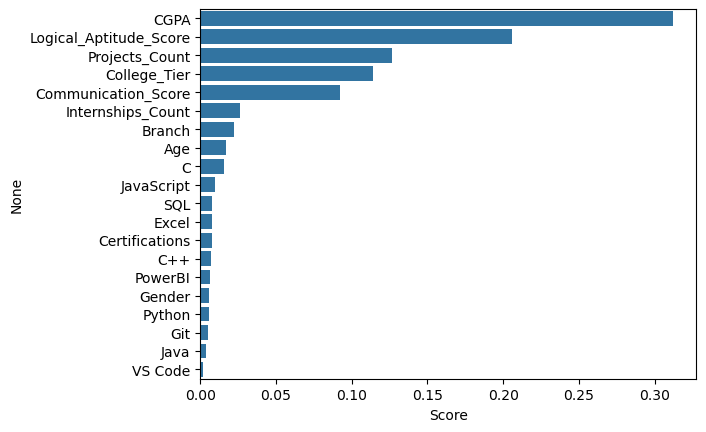

In [339]:
sns.barplot(x=features_imp['Score'],y=features_imp.index)

In [340]:
features_imp['Percentage']=((features_imp['Score']/features_imp['Score'].sum())*100).round(2)

In [341]:
features_imp

,Score,Percentage
CGPA,0.312045,31.20
Logical_Aptitude_Score,0.205532,20.55
Projects_Count,0.126342,12.63
College_Tier,0.114065,11.41
Communication_Score,0.092409,9.24
Internships_Count,0.026404,2.64
Branch,0.022487,2.25
Age,0.017233,1.72
C,0.015888,1.59
JavaScript,0.009568,0.96


In [342]:
from sklearn.model_selection import train_test_split

In [343]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)

In [344]:
rfc_tr = RandomForestClassifier(n_estimators=30,max_depth=4,oob_score=True,random_state=2)

In [345]:
rfc_tr.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=30, oob_score=True,
                       random_state=2)

In [346]:
y_pred = rfc_tr.predict(x_test)

In [347]:
accuracy_score(y_pred,y_test)

0.816

Text(50.722222222222214, 0.5, 'Actual Y')

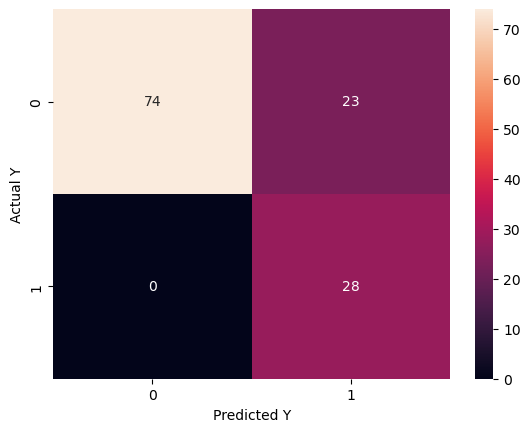

In [348]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

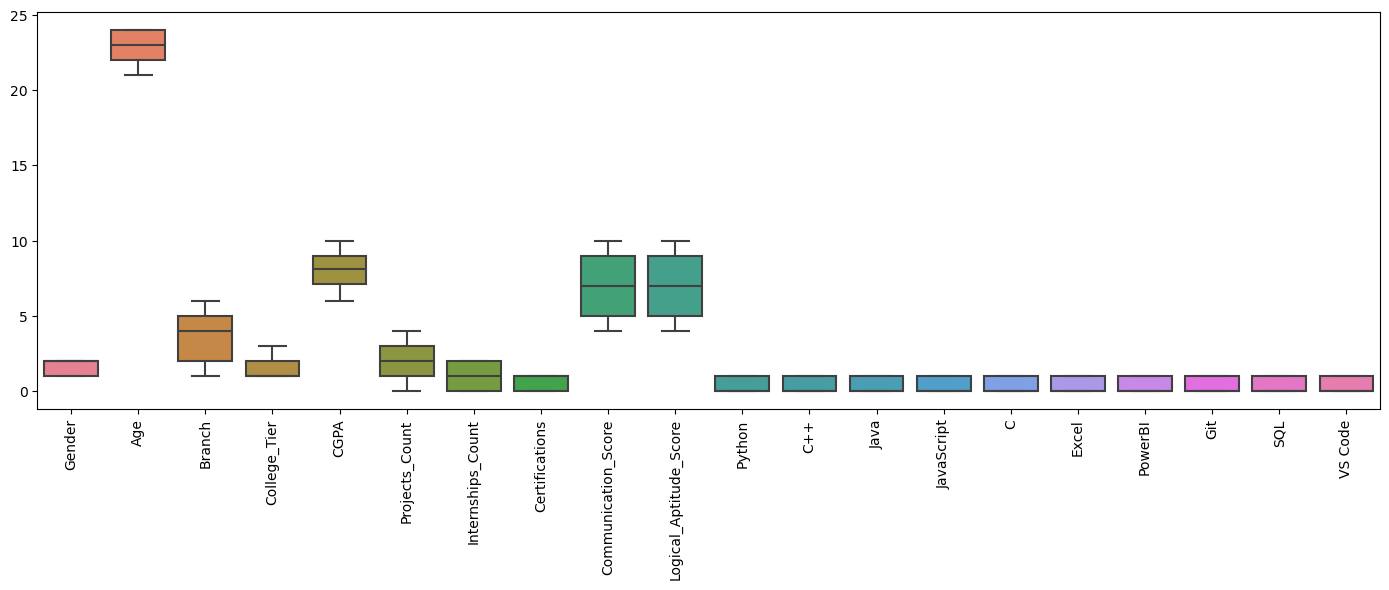

In [349]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=x, fliersize=6, linewidth=1.5, flierprops=dict(marker='o', color='red', alpha=0.6))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [350]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate PPV and NPV
ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
npv = tn / (tn + fn) if (tn + fn) > 0 else 0

print(f"Positive Predictive Value (PPV): {ppv:.2f}")
print(f"Negative Predictive Value (NPV): {npv:.2f}")

Positive Predictive Value (PPV): 1.00
Negative Predictive Value (NPV): 0.76


In [351]:
y_pred = rfc.predict(x)

In [352]:
accuracy_score(y_pred,y)

0.902

Text(50.722222222222214, 0.5, 'Actual Y')

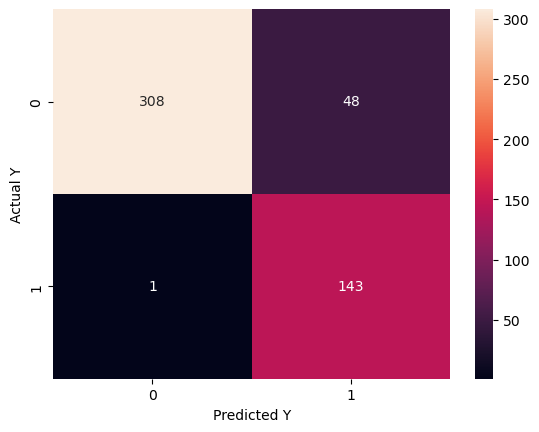

In [353]:
sns.heatmap(confusion_matrix(y_pred,y),annot=True,fmt='d', cmap='rocket')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

In [354]:
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

# Calculate PPV and NPV
ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
npv = tn / (tn + fn) if (tn + fn) > 0 else 0

print(f"Positive Predictive Value (PPV): {ppv:.2f}")
print(f"Negative Predictive Value (NPV): {npv:.2f}")

Positive Predictive Value (PPV): 0.99
Negative Predictive Value (NPV): 0.87


In [455]:
x1 = df[['Age', 'College_Tier', 'CGPA', 'Projects_Count', 'Internships_Count', 'Communication_Score', 'Gender']]

In [456]:
y1 = df['Final_Selection']

In [457]:
model1 = sm.OLS(y1,x1)
result1 = model1.fit()
print(result1.summary())

                                 OLS Regression Results                                
Dep. Variable:        Final_Selection   R-squared (uncentered):                   0.601
Model:                            OLS   Adj. R-squared (uncentered):              0.596
Method:                 Least Squares   F-statistic:                              106.2
Date:                Sat, 26 Jul 2025   Prob (F-statistic):                    3.17e-94
Time:                        17:57:17   Log-Likelihood:                         -239.06
No. Observations:                 500   AIC:                                      492.1
Df Residuals:                     493   BIC:                                      521.6
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------